<h1><b>GENERATOR FOR BALANCED PAIRS<b><h1>

<h4>This notebook depicts subsampling the images, splitting them into training, validation and test, and mainly generating balanced pairs of images<h4>

Importing relevant libraries

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')

Importing a costume created module by Petr Nguyen

In [2]:
import src_PN.PN_functions as PN

Creating paths for saving generated data frames

In [3]:
if not os.path.exists('./csv/'):
    os.makedirs('./csv/')

Parameters' initialization

In [4]:
random_seed = 1234
test_size = 0.2
validation_size = 0.2
total_num_pairs = 5000
train_num_pairs = int((1 - test_size - validation_size)*total_num_pairs)
valid_num_pairs = int(validation_size*total_num_pairs)
test_num_pairs = int(test_size*total_num_pairs)

Reading and subsampling the images

In [5]:
identity_filtered = PN.images_subsampling()

In [6]:
identity_filtered

,image,image_id
0,000001.jpg,2880
1,000002.jpg,2937
2,000003.jpg,8692
3,000004.jpg,5805
4,000005.jpg,9295
...,...,...
202594,202595.jpg,9761
202595,202596.jpg,7192
202596,202597.jpg,9852
202597,202598.jpg,5570


In [7]:
atts = PN.read_attributes_df(identity_filtered)

In [8]:
atts

,image,w5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,0,1,1,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
1,000002.jpg,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2,000003.jpg,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,000004.jpg,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
4,000005.jpg,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
202595,202596.jpg,0,0,0,0,0,1,1,0,0,...,0,1,1,0,0,0,0,0,0,1
202596,202597.jpg,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
202597,202598.jpg,0,1,1,0,0,0,1,0,1,...,0,1,0,1,1,0,1,0,0,1


Splitting the images into training, validation and test sets

In [9]:
train_imgs, train_labels, valid_imgs, valid_labels, test_imgs, test_labels = PN.images_split(identity_filtered, test_size, test_size, random_seed, True)

In [10]:
print(f'Number of images in the training set: {len(train_imgs)}')
print(f'Number of images in the validation set: {len(valid_imgs)}')
print(f'Number of images in the test set: {len(test_imgs)}')

Number of images in the training set: 120171
Number of images in the validation set: 40058
Number of images in the test set: 40058


Generating balanced pairs for training, validation and test sets

In [11]:
train_pairs = PN.pairs_generator(train_labels, train_imgs, atts, random_seed, 3000, 'train')

3000 unique balanced pairs generated                                                             

Total Run Time: 1.26 minutes 



In [28]:
valid_pairs = PN.pairs_generator(valid_labels, valid_imgs, atts, random_seed, valid_num_pairs, 'valid')

1000 unique balanced pairs generated                                                             

Total Run Time: 0.42 minutes 



In [21]:
test_pairs = PN.pairs_generator(test_labels, test_imgs, atts, random_seed, test_num_pairs, 'test')

1000 unique balanced pairs generated                                                             

Total Run Time: 0.41 minutes 



In [29]:
train_pairs

,img_1,img_2,label
1727,064464.jpg,121197.jpg,0
2514,160962.jpg,012270.jpg,1
1411,042553.jpg,134197.jpg,0
2738,112045.jpg,057882.jpg,1
432,063074.jpg,148085.jpg,1
...,...,...,...
1470,125371.jpg,076615.jpg,1
2655,080316.jpg,121197.jpg,0
513,141502.jpg,083117.jpg,0
2396,136715.jpg,119862.jpg,1


Checking the generated pairs

In [30]:
PN.pairs_check(train_pairs, atts)

Label distribution ... Negative: 1500 (50%) | Positive: 1500 (50%)
Number of unique pairs ... 3000
Number of pairs containing the same image ... 0
Number of images ... 2886
Gender distribution ... Female: 1500 (50%) | 1500: 1500 (50%)


In [31]:
PN.pairs_check(valid_pairs, atts)

Label distribution ... Positive: 500 (50%) | Negative: 500 (50%)
Number of unique pairs ... 1000
Number of pairs containing the same image ... 0
Number of images ... 1002
Gender distribution ... Male: 500 (50%) | 500: 500 (50%)


In [32]:
PN.pairs_check(test_pairs, atts)

Label distribution ... Positive: 500 (50%) | Negative: 500 (50%)
Number of unique pairs ... 1000
Number of pairs containing the same image ... 0
Number of images ... 1002
Gender distribution ... Male: 500 (50%) | 500: 500 (50%)


Plotting the pairs

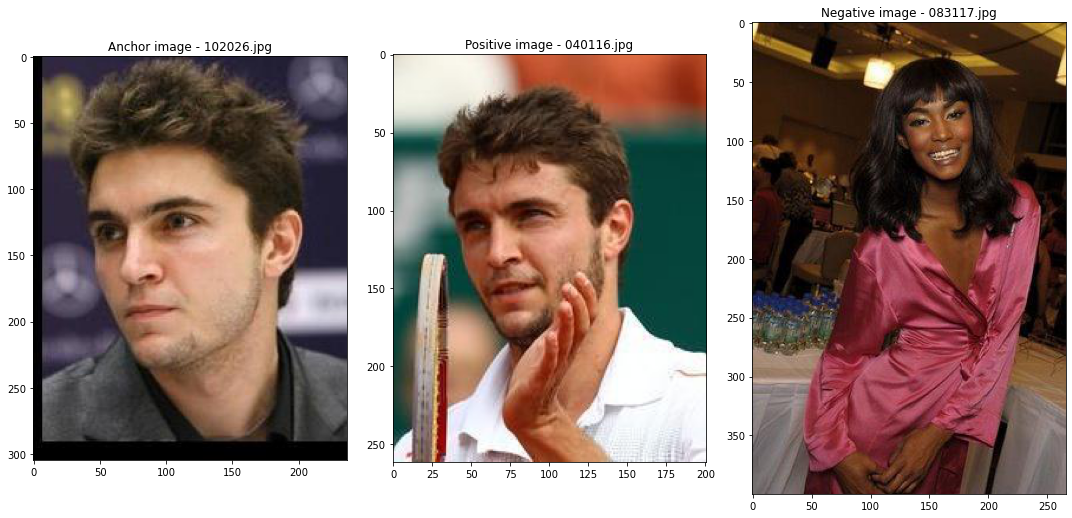

In [38]:
PN.plot_pairs(train_pairs, resize = False)

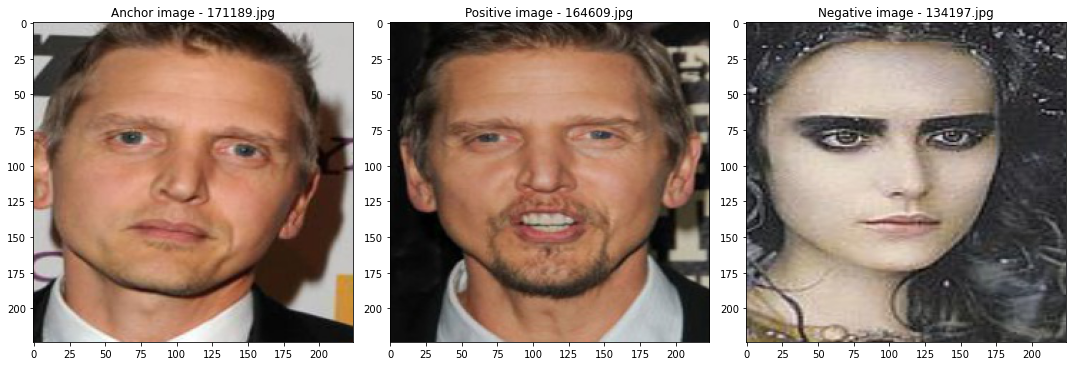

In [40]:
PN.plot_pairs(train_pairs, resize = True)